### Équations et systèmes différentiels

**Librairies**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Équation différentielle du premier degré

On considère l'équation différentielle suivante, qui décrit l'évolution d'une variable \$y(t)\$ au cours du temps :

$$
\frac{dy}{dt} = a y - b y^2
$$

où $a$ et $b$ sont deux constantes positives, et $y(t)$ est la fonction inconnue.

---

On cherche à résoudre cette équation **numériquement** avec les valeurs suivantes :

* $a = 1{,}5$
* $b = \frac{a}{4}$
* $y(t_0) = 0{,}5$

On commence par créer une **liste de temps** discrète :

$$
\texttt{liste\_t} = [t_0, t_1, t_2, \ldots, t_{n-1}]
$$

Puis on écrit une fonction Python `derivee(y, t)` qui calcule la valeur de la dérivée :

$$
\frac{dy}{dt} = a y - b y^2
$$

au point $(t, y)$, en particulier lorsque $t = t_0$ et $y = y(t_0)$.

---

En utilisant une approximation de type **Euler explicite**, on approche la dérivée par :

$$
\frac{y(t_1) - y(t_0)}{t_1 - t_0} \approx \left. \frac{dy}{dt} \right|_{t = t_0}
$$

ce qui permet de calculer :

$$
y(t_1) \approx y(t_0) + (t_1 - t_0) \cdot \left( a y(t_0) - b y(t_0)^2 \right)
$$

Puis on itère ce calcul pour obtenir successivement $y(t_2)$, $y(t_3)$, etc.

---

Cette procédure peut être réalisée automatiquement avec la fonction `odeint` du module `scipy.integrate`, qui intègre numériquement l’équation.

La fonction à fournir doit obligatoirement prendre en arguments `y` et `t`, même si $t$ n’apparaît pas dans l'expression.

L’appel à la fonction se fait ainsi :

```python
odeint(derivee, y0, liste_t)
```

Elle renvoie une liste contenant les valeurs de $y(t)$ pour chaque instant dans `liste_t`.


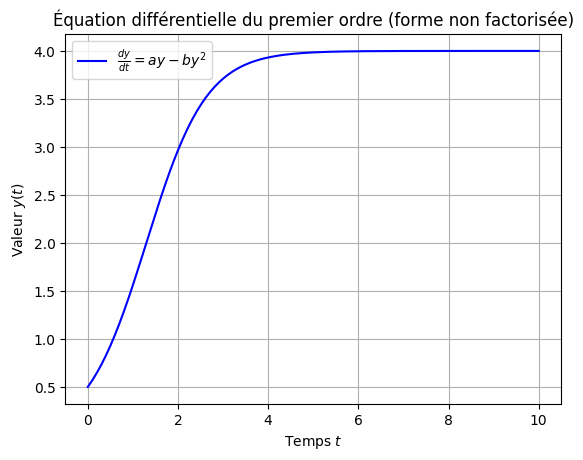

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# === Paramètres ===
a = 1.5
b = a / 4  # donc b = 0.375
y0 = 0.5   # condition initiale

# === Équation différentielle : dy/dt = a*y - b*y^2 ===
def derivee(y, t):
    return a * y - b * y**2  # forme non factorisée

# === Liste de temps ===
liste_t = np.linspace(0, 10, 200)  # de t=0 à t=10

# === Résolution avec odeint ===
liste_y = odeint(derivee, y0, liste_t)

# === Tracé de la solution ===
plt.plot(liste_t, liste_y, label=r"$\frac{dy}{dt} = a y - b y^2$", color='blue')
plt.title("Équation différentielle du premier ordre (forme non factorisée)")
plt.xlabel("Temps $t$")
plt.ylabel("Valeur $y(t)$")
plt.grid(True)
plt.legend()
plt.show()


### Équation différentielle du second degré

Dans le cas d’une équation différentielle du second degré de la forme :

$$
y'' = f(y, y', t)
$$

il faut **transformer l’équation** en un système de deux équations du premier ordre, vérifié par :

$$
\text{syst} =
\begin{pmatrix}
y' \\
y
\end{pmatrix}
$$

On peut alors utiliser la fonction `odeint` en remplaçant `y` par un vecteur `syst = [y', y]`.
La fonction `derivee(syst, t)` doit alors renvoyer la dérivée de :

$$
\begin{pmatrix}
y' \\
y
\end{pmatrix}
\quad \text{c’est-à-dire} \quad
\begin{pmatrix}
y'' \\
y'
\end{pmatrix}
$$

---

Exemple

Résoudre l’équation :

$$
\frac{d^2 y}{dt^2} = -3 \frac{dy}{dt} - 9y(t) + t
\quad \text{pour} \quad t \in [0, 2]
$$

avec les conditions initiales :

$$
y(0) = 0 \quad \text{et} \quad \left. \frac{dy}{dt} \right|_{t = 0} = 1
$$

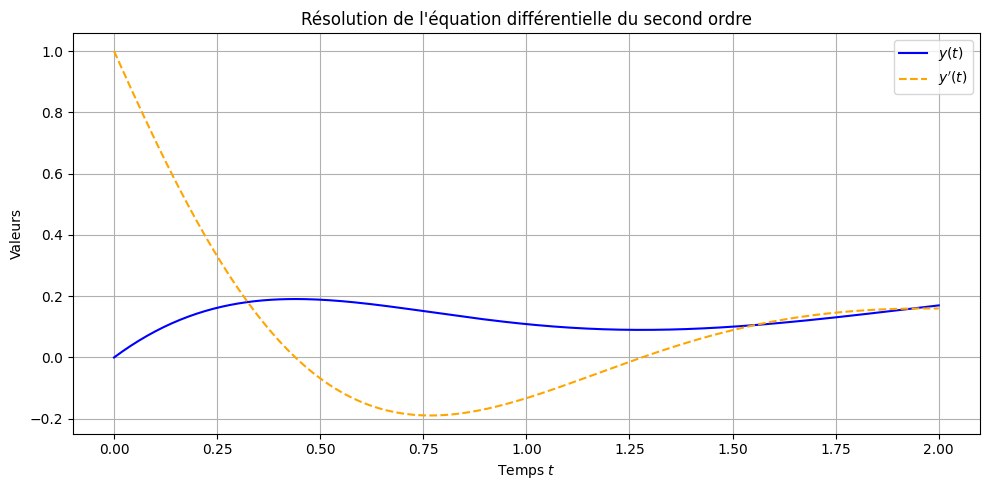

In [4]:
# === Définition du système : u[0] = y', u[1] = y ===
def derivee(u, t):
    y_prime = u[0]
    y = u[1]
    y_seconde = -3 * y_prime - 9 * y + t
    return [y_seconde, y_prime]

# === Conditions initiales ===
y0 = 0
y_prime0 = 1
u0 = [y_prime0, y0]  # ordre : [y'(0), y(0)]

# === Temps ===
liste_t = np.linspace(0, 2, 200)

# === Résolution ===
solution = odeint(derivee, u0, liste_t)

# === Extraction ===
liste_y_prime = solution[:, 0]  # y'
liste_y = solution[:, 1]        # y

# === Tracé ===
plt.figure(figsize=(10, 5))
plt.plot(liste_t, liste_y, label=r"$y(t)$", color='blue')
plt.plot(liste_t, liste_y_prime, label=r"$y'(t)$", linestyle='--', color='orange')
plt.xlabel("Temps $t$")
plt.ylabel("Valeurs")
plt.title("Résolution de l'équation différentielle du second ordre")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()